# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn for Machine Learning and Regression Models
from sklearn.linear_model import LinearRegression

In [2]:
# Define a function that processes the CSV file
def analyze_csv(file_path):
    '''
    Analyzes a CSV file by loading it into a pandas DataFrame, inspecting the structure,
    and summarizing missing data, duplicates, general information, and descriptive statistics.

    Parameters:
    file_path (str): The file path of the CSV file to be processed.

    Returns:
    pd.DataFrame: A pandas DataFrame containing the loaded dataset after analysis.

    Functionality:
    - Loads the CSV file into a pandas DataFrame.
    - Identifies and replaces common missing value indicators (e.g., 'N/A', '-', etc.) with pandas' NA.
    - Provides the shape (rows and columns) of the dataset and previews the first 5 rows.
    - Detects and reports the number and percentage of missing values in each column.
    - Checks for duplicates and reports the total number of duplicate rows.
    - Displays general information about the dataset (column types, non-null values).
    - Generates descriptive statistics (e.g., mean, median, std, etc.) for numerical columns.
    
    Example:
    >>> analyze_csv('movies_data.csv')
    
    Notes:
    - Missing value indicators like '', ' ', 'N/A', None, etc., are treated as missing data.
    - If the dataset contains no missing values, a clean status message is shown.
    - If missing data is present, a summary of missing values, including the count and percentage, is provided.
    '''
    
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Define indicators for missing values across different formats
    missing_value_indicators = ['', ' ', '-', '--', 'missing', 'Missing', 'N/A', 'n/a', None]
    
    # Display the shape and the first 5 rows of the DataFrame
    print("Shape of DataFrame:", data.shape)
    print("First 5 rows:")
    print(data.head())

    # Replace missing value indicators with pandas' NA value
    data.replace(missing_value_indicators, pd.NA, inplace=True)
    
    # Identify and count the missing values in each column
    missing_data = data.isna().sum()
    
    # Calculate the total number of rows for reference
    total_rows = data.shape[0]
    
    # Compute the percentage of missing data for each column
    missing_percentage = (missing_data / total_rows) * 100

    # Check if the dataframe is clean (no missing values)
    if missing_data.sum() == 0:
        print("\nThe DataFrame is clean - no missing values.")
    else:
        print("\nThere are missing values in the DataFrame.")
        
        # Create a summary DataFrame that combines both the counts and percentages of missing data
        missing_summary = pd.DataFrame({
            'Missing Values': missing_data,
            'Percentage': missing_percentage
        })
    
        # Filter the summary to display only columns with missing data
        missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
    
        # Print the summary of missing values
        print("\nMissing Data Summary:")
        print(missing_summary)
    

    # Check for duplicates and print the number of duplicate rows
    duplicate_rows = data.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")
    
    # Display general info and descriptive statistics
    print("\nGeneral Information:")
    print(data.info())
    
    print("\nDescriptive Statistics:")
    print(data.describe())

    return data


## 1. Gather data

Data was collected using two methods:

1. **Uploading Downloaded Files**: The **IMDB** and **Genre** datasets were downloaded as CSV files and uploaded for analysis.
   
2. **Data Extraction via API**: The **Earning** dataset was obtained through the Kaggle API, providing the latest available data.

These datasets will be integrated for comprehensive analysis.

### **1.1.** Problem Statement


For this project, I will analyze key factors influencing movie performance using data from the **IMDB**, **Genre**, and **Earning** datasets. The analysis will address several critical questions, including:

Here are the revised, shorter analytical exploratory questions:

1. **What are the trends in the distribution of movie genres, and what insights can be drawn about audience preferences?**

2. **How does a movie's budget relate to its box office earnings, and what factors influence this relationship?**

3. **How do movie ratings impact box office revenue, and is there a direct correlation between the two?**

4. **How are movie runtimes distributed, and what patterns can be identified in terms of industry standards and audience expectations?**


These analyses will provide a comprehensive understanding of the financial dynamics of the movie industry, identifying patterns and trends that drive success across different dimensions.

### **1.2. Data Collection: Gathering Datasets Using Different Methods**

Here's the revised section of your report, now updated to reflect the use of `requests` for downloading the dataset:

---

**For this project, data was collected using two different methods: manual downloading and programmatic extraction via an API. Below is a detailed description of each dataset and the method used to gather it.**

1. **Manual Downloading**:
   - One dataset was manually downloaded from Kaggle. The dataset was available for public access, and I downloaded the CSV file directly from the Kaggle website.

2. **Programmatic Downloading via `requests`**:
   - Another dataset was stored on Google Drive and retrieved programmatically using the Python `requests` library. I obtained a shareable link for the file on Google Drive, extracted the file ID from the URL, and then used `requests` to send an HTTP GET request to the Google Drive API. The file was downloaded and saved locally with the name `movie_data.csv`.

#### **1. IMDb Dataset**

- **Method**: The IMDb dataset was manually downloaded as a CSV file from a reputable online repository.

- **Description**:  
The IMDB dataset contains detailed information about various movies, including user ratings, total votes, critical reception, budget, and runtime. This dataset is valuable for understanding a movie’s reception, its financial aspects, and its runtime.

| **Column Name**  | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| **Movie_id**     | A unique identifier assigned to each movie in the dataset.                      |
| **Title**        | The name of the movie, including the release year in parentheses.               |
| **Rating**       | The average rating of the movie, as provided by IMDb users.                     |
| **TotalVotes**   | The total number of votes that the movie has received on IMDb.                  |
| **MetaCritic**   | The average critical review score of the movie from the MetaCritic platform.    |
| **Budget**       | The reported production budget of the movie.                                    |
| **Runtime**      | The duration of the movie in minutes, typically followed by the text "min."     |

In [3]:
imdb = analyze_csv('IMDB.csv')

Shape of DataFrame: (117, 52)
First 5 rows:
   Movie_id                    Title  Rating  TotalVotes  MetaCritic  \
0     36809  12 Years a Slave (2013)     8.1      496092        96.0   
1     30114         127 Hours (2010)     7.6      297075        82.0   
2     37367             50/50 (2011)     7.7      283935        72.0   
3     49473        About Time (2013)     7.8      225412         NaN   
4     14867             Amour (2012)     7.9       76121        94.0   

       Budget  Runtime  CVotes10  CVotes09  CVotes08  ...  Votes3044  \
0  20000000.0  134 min     75556    126223    161460  ...        8.0   
1  18000000.0   94 min     28939     44110     98845  ...        7.5   
2   8000000.0  100 min     28304     47501     99524  ...        7.6   
3  12000000.0  123 min     38556     43170     70850  ...        7.6   
4   8900000.0  127 min     11093     15944     22942  ...        7.7   

   Votes3044M  Votes3044F  Votes45A  Votes45AM  Votes45AF  VotesIMDB  \
0         7.9     

#### **2. Genre Dataset**

- **Method**: This dataset was manually downloaded as a CSV file from an online source.
- **Description**:  
The Genre dataset provides information about the genre(s) associated with each movie. Each movie is categorized into one or more genres, which helps in classifying the movies for genre-based analysis.

| **Column Name**  | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| **Movie_id**     | A unique identifier for each movie, matching the `Movie_id` in other datasets.  |
| **Genre**        | The genre(s) associated with the movie, such as Comedy, Drama, Action, etc.     |

In [4]:
genre = analyze_csv('genre.csv')

Shape of DataFrame: (351, 2)
First 5 rows:
   Movie_id      genre
0     36809  Biography
1     30114  Adventure
2     37367     Comedy
3     49473     Comedy
4     14867      Drama

There are missing values in the DataFrame.

Missing Data Summary:
       Missing Values  Percentage
genre              41   11.680912

Number of duplicate rows: 7

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_id  351 non-null    int64 
 1   genre     310 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.6+ KB
None

Descriptive Statistics:
           Movie_id
count    351.000000
mean   31332.888889
std    11664.509757
min    10015.000000
25%    22401.000000
50%    31722.000000
75%    41512.000000
max    49590.000000


#### **3. Earning Dataset**

- **Method**: The **Earning** dataset was programmatically extracted via the Kaggle API using the `kagglehub` package.
- **Description**:  
The Earning dataset includes the box office earnings for each movie, both domestically and worldwide. This financial data is useful for analyzing the commercial success of movies.

| **Column Name**  | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| **Movie_id**     | A unique identifier for each movie, corresponding to the `Movie_id` in other datasets. |
| **Domestic**     | The domestic earnings of the movie, derived from box office revenue.           |
| **Worldwide**    | The worldwide earnings of the movie, including both domestic and international revenue. |

In [5]:
import requests

# Google Drive shareable link (file ID extracted from the URL)
file_id = '1qee8_W7uKIyzhpdisCloYkJi5bYqYa30'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Send a GET request to download the file
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open('movie_data.csv', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully!")
else:
    print("Failed to download the file. Status code:", response.status_code)
    
earning = analyze_csv('movie_data.csv')

File downloaded successfully!
Shape of DataFrame: (117, 3)
First 5 rows:
   Movie_id  Domestic    Worldwide
0     36809  56671993  187733202.0
1     30114  18335230   60738797.0
2     37367  35014192   39187783.0
3     49473  15322921   87100449.0
4     14867   6739492   19839492.0

The DataFrame is clean - no missing values.

Number of duplicate rows: 0

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Movie_id   117 non-null    int64  
 1   Domestic   117 non-null    int64  
 2   Worldwide  117 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.9 KB
None

Descriptive Statistics:
           Movie_id      Domestic     Worldwide
count    117.000000  1.170000e+02  1.170000e+02
mean   31332.888889  1.360294e+08  3.403780e+08
std    11697.980442  1.462924e+08  3.719455e+08
min    10015.000000  2.232100e+04  2.232100e+

## 2. Assess data

In this section, the data is assessed for quality and tidiness issues. These issues are evaluated both visually and programmatically, and potential solutions are proposed based on the findings. Below, we outline two data quality issues and two tidiness issues identified across the datasets.

### **Quality Issues:**

Quality issues pertain to the **accuracy** and **completeness** of the data. These issues arise from missing or incorrect information, which can skew analysis results.

- **Missing Data**: Missing values in columns like **MetaCritic**, **Budget**, and **Genre** compromise dataset completeness and can lead to biased analysis.
- **Duplicate Data**: Duplicate records introduce redundancy, affecting data accuracy and potentially distorting analysis results.


#### **Quality Issue 1: Irrelevant Columns in IMDb Dataset**
   - **Issue**: The **IMDb** dataset contains 52 columns, many of which are unnecessary for the analysis.
   - **Justification**: Unnecessary columns add complexity, increase processing time, and obscure key insights. 
   - **Cleaning strategy**: Drop irrelevant columns to retain only those essential for analysis, streamlining the dataset for more efficient analysis.

#### **Quality Issue 2: Missing Data in IMDb dataset**
   - **Issue**: Several important columns, including **MetaCritic**, **Budget**, and **Runtime**, contain missing values.
   - **Justification**: Missing information in these columns can significantly affect the quality of analysis, particularly when exploring the relationship between a film's budget, runtime, and its financial performance or critical reception. Incomplete data leads to unreliable conclusions and undermines the accuracy of any insights drawn from the dataset.
   - **Cleaning strategy**: 
     - For **MetaCritic** and **Budget**, we will replace the missing values with a default value of `0`, indicating the absence of data.
     - For **Runtime**, we will similarly impute missing values with `0` to ensure the dataset remains consistent and complete for analysis.

#### **Quality Issue 3: Missing Genre Information in Genre dataset**
   - **Issue**: The **Genre** column in the dataset has missing entries for several movies.
   - **Justification**: Missing genre information makes it difficult to accurately analyze genre-specific trends or understand how different genres perform in terms of revenue and popularity. This could limit the ability to generate actionable insights from the data.
   - **Cleaning strategy**: Missing values in the **Genre** column will be replaced with the term "Unknown," allowing the dataset to remain consistent while acknowledging the absence of specific genre information.

#### **Quality Issue 4: Duplicate Rows in Genre dataset**
   - **Issue**: The **Genre** dataset contains 7 duplicate rows, where the same movie is listed multiple times with identical genre entries.
   - **Justification**: Duplicate rows distort analysis by artificially inflating counts and potentially affecting genre-specific insights. Removing duplicates ensures data accuracy and prevents misleading results.
   - **Cleaning strategy**: Duplicate rows in the **Genre** dataset will be removed, leaving only one entry per movie for each genre. This will maintain dataset integrity while allowing for accurate genre-based analysis.

### **Tidiness Issues:**

In data analysis, **tidiness** refers to the systematic organization of data to facilitate efficient and accurate analysis. A tidy dataset adheres to the following principles:

- **Each variable** forms a column.
- **Each observation** forms a row.
- **Each type of observational unit** forms a separate table.

When data is not tidy, it can create challenges in analysis, leading to:

- **Inaccuracies** in deriving insights.
- **Inefficiencies** in processing and analyzing data.
- **Difficulties** in extracting meaningful conclusions.

#### **Tidiness Issue 1: Runtime Column in Incorrect Format**
- **Issue**: The `Runtime` column contains values such as "134 min" and "94 min" as text, which hinders numerical analysis.
  
- **Justification**: Numeric operations, such as averaging or comparisons, cannot be performed on string data.

- **Cleaning Strategy**: Extract the numeric portion from the `Runtime` column, remove the "min" text, and convert the resulting values into integers.

#### **Tidiness Issue 2: Title and Release Year Combined in One Column**
- **Issue**: The `Title` column combines both the movie title and the release year (e.g., "12 Years a Slave (2013)"), making it difficult to analyze by year or title separately.

- **Justification**: Splitting the `Title` column into two distinct columns allows for more precise filtering, year-based analysis, and better handling of the release year as a numeric value.

- **Cleaning Strategy**: Split the `Title` column into two new columns: one for the `Title` (movie name) and another for the `Release Year` (as an integer).

#### **Tidiness Issue 3: Multiple Genres for One Movie**
- **Issue**: A movie with multiple genres is represented with multiple entries in the `genre` column (e.g., "Comedy", "Action") for the same `Movie_id`, making it difficult to analyze genres independently.

- **Justification**: Each row should represent a unique observation with one value per variable. Multiple genres per movie should be either combined into one column (with a delimiter) or spread across separate rows.

- **Cleaning Strategy**: Combine multiple genres for a movie into a single column, separated by a delimiter like a pipe `|` (e.g., "Comedy|Action").

- **Code to Detect the Issue**:

In [6]:
# Checking if any Movie_id has more than one genre
duplicate_genres = genre.groupby('Movie_id')['genre'].nunique()

# Display Movie_ids where more than one genre is assigned
multi_genre_movies = duplicate_genres[duplicate_genres > 1]

# Print the Movie_ids and genres that have multiple genres
print(f"Movies with multiple genres:\n{multi_genre_movies}")

Movies with multiple genres:
Movie_id
10015    2
10023    3
10099    3
10454    2
10617    3
        ..
48554    3
48626    3
49473    3
49518    3
49590    3
Name: genre, Length: 110, dtype: int64


**Explanation**:
The above code groups the dataset by `Movie_id` and checks how many unique genres are associated with each movie. If a movie has more than one genre, it will be flagged, and the `multi_genre_movies` variable will display these movies, highlighting the tidiness issue. This will show you which movies need to be addressed to ensure the data is tidy.

## 3. Clean data

This section addresses the identified data quality and tidiness issues. Each issue will be resolved with appropriate cleaning methods, followed by validation through either programmatic or visual checks.

Unnecessary variables will be removed. Additionally, duplicate rows will be removed to ensure data accuracy.

The cleaning steps will focus on:

1. **Handling Missing Data**: Imputing or removing missing values.
2. **Correcting Data Types**: Converting columns to proper types.
3. **Tidying Data**: Restructuring columns and rows for consistency.
4. **Removing Duplicates**: Eliminating redundant entries.

This ensures the datasets are clean, structured, and ready for analysis.

### **Preserving Raw Data for Integrity**

It is crucial to preserve the integrity of the raw datasets during the cleaning process. By creating copies of the datasets, we ensure the original data remains unaltered and can be referenced if necessary. This practice allows for reproducibility and safeguards against any errors that may occur during data cleaning.

To ensure this, we will create copies of the datasets with the suffix `_clean`, so we can carry out necessary transformations and cleaning steps on the duplicates while maintaining the original datasets intact.

In [7]:
# Creating copies of the IMDb, Genre, and Earning datasets to preserve the raw data
imdb_clean = imdb.copy()
genre_clean = genre.copy()
earning_clean = earning.copy()

#### **Handling Quality Issue 1: Irrelevant Columns in IMDb Dataset**

We will drop the irrelevant columns from column 8 to the end of the IMDb dataset, modifying the dataframe in place.

In [8]:
# Dropping columns from column 8 to the end in the IMDb dataset inplace
imdb_clean.drop(imdb_clean.columns[7:], axis=1, inplace=True)

In [9]:
# Validate the cleaning
assert imdb_clean.shape[1] == 7, "The columns were not dropped correctly, unexpected number of columns"

This ensures the dataset only contains relevant columns, optimizing it for further analysis.

#### **Handling Quality Issue 2: Missing Data in IMDb Dataset**

To address missing data in **MetaCritic**, **Budget**, and **Runtime** columns, we will fill missing values with 0 and ensure **Runtime** is properly formatted as an integer.

In [10]:
# Impute missing values in MetaCritic and Budget columns with 0
imdb_clean['MetaCritic'] = imdb_clean['MetaCritic'].fillna(0)
imdb_clean['Budget'] = imdb_clean['Budget'].fillna(0)

# For the Runtime column: ensure the values are strings, remove "min", convert to numeric, and fill missing values with 0
imdb_clean['Runtime'] = imdb_clean['Runtime'].astype(str)  # Ensure it's a string
imdb_clean['Runtime'] = imdb_clean['Runtime'].str.replace(' min', '', regex=False)  # Remove 'min'
imdb_clean['Runtime'] = pd.to_numeric(imdb_clean['Runtime'], errors='coerce')  # Convert to numeric, NaNs will be coerced
imdb_clean['Runtime'] = imdb_clean['Runtime'].fillna(0)  # Fill NaN values with 0
imdb_clean['Runtime'] = imdb_clean['Runtime'].astype(int)

In [11]:
# Validate the cleaning
assert imdb_clean['MetaCritic'].isnull().sum() == 0, "MetaCritic column still contains missing values"
assert imdb_clean['Budget'].isnull().sum() == 0, "Budget column still contains missing values"
assert imdb_clean['Runtime'].isnull().sum() == 0, "Runtime column still contains missing values"
assert all(imdb_clean['Runtime'] >= 0), "Runtime column contains negative values"

This ensures that all missing values in the relevant columns are addressed, and the **Runtime** column is correctly formatted as a numeric type for further analysis.

#### **Handling Quality Issue 3: Missing Genre Information**

To address missing values in the **Genre** column, we will replace them with **"Unknown"** to ensure consistency without losing data.

In [12]:
# Replace empty strings with 'Unknown'
genre_clean['genre'] = genre_clean['genre'].replace('', 'Unknown')

# Fill any remaining NaN values with 'Unknown'
genre_clean['genre'] = genre_clean['genre'].fillna('Unknown')

In [13]:
# Validate the cleaning
assert genre_clean['genre'].isnull().sum() == 0, "There are still missing values in the Genre column"

This step resolves missing genre information, ensuring data consistency for analysis.

#### **Handling Quality Issue 4: Duplicate Rows in Genre Dataset**

We will remove duplicate rows in the **Genre** dataset to ensure accurate analysis and prevent inflated counts.

In [14]:
# Remove duplicate rows in the 'Genre' dataset
genre_clean.drop_duplicates(inplace=True)

In [15]:
# Validate the cleaning
assert genre_clean.duplicated().sum() == 0, "There are still duplicate rows in the Genre dataset"

This step ensures that the dataset is free from duplicates, maintaining its integrity for more accurate genre-based insights.

#### Handling Tidiness Issue 1: Runtime Column in Incorrect Format

The issue of the **Runtime** column containing values such as "134 min" and "94 min" in text format was addressed in **Handling Quality Issue 2**, where we removed the "min" text and converted the values to integers for proper numerical analysis.

In [16]:
# Assert to check if 'Runtime' column is correctly formatted as integers
assert imdb_clean['Runtime'].dtype == 'int', "Runtime column is not correctly formatted as integers."

The assertion confirms that the **Runtime** column is now properly formatted as integers, ensuring it is ready for accurate numerical analysis.

#### **Handling Tidiness Issue 2: Title and Release Year Combined**

The **Title** column contains both movie names and release years. To enable separate analysis of the title and year, we will split the column into two distinct columns: **Title** and **Release Year**.

In [17]:
# Split the Title column into Title and Release Year columns
imdb_clean[['Title', 'Release Year']] = imdb_clean['Title'].str.extract(r'^(.*?)\s\((\d{4})\)$')
imdb_clean['Release Year'] = imdb_clean['Release Year'].astype(int)  # Convert Release Year to integer

In [18]:
# Validate the cleaning
assert 'Release Year' in imdb_clean.columns, "Release Year column was not created"
assert imdb_clean['Release Year'].dtype == 'int', "Release Year column is not in integer format"

This split ensures that the **Title** and **Release Year** are now distinct, supporting better analysis and operations.

#### **Handling Tidiness Issue 3: Multiple Genres for One Movie**

The **Genre** column contains multiple genres for a single movie in separate rows. To ensure each movie is represented by a unique observation, we will combine multiple genres into a single column, separated by a delimiter (pipe `|`).

In [19]:
# Group by Movie_id and combine genres into a single string separated by a pipe '|'
genre_clean['genre'] = genre_clean.groupby('Movie_id')['genre'].transform(lambda x: '|'.join(x.unique()))

# Remove duplicates (if any) based on Movie_id to ensure unique rows
genre_clean = genre_clean.drop_duplicates(subset=['Movie_id'])

In [20]:
# Validate the cleaning
assert genre_clean['genre'].notna().all(), "Genre column contains missing values"

This transformation consolidates multiple genres into a single column, ensuring proper tidiness and facilitating genre-based analysis.

## 4. Update your data store

With all data now thoroughly cleaned, we can confidently save the cleaned versions of each dataset, ensuring original files remain unaltered. These saved files retain all cleaning transformations for reliable analysis.

In [21]:
# Save the cleaned datasets
imdb_clean.to_csv('imdb_clean.csv', index=False)
genre_clean.to_csv('genre_clean.csv', index=False)
earning_clean.to_csv('earning_clean.csv', index=False)

All cleaned datasets are saved. We will next merge these datasets to begin our analysis, ensuring data consistency for effective exploration.

### **Merging Cleaned Datasets for Analysis**

With the cleaned datasets ready, we’ll perform an inner merge on the `Movie_id` column to create a unified dataset for analysis. This consolidated dataset will allow for a comprehensive view, combining information from IMDb, genre, and earnings data.

In [22]:
# Merge the cleaned datasets on the Movie_id column
merged_data = imdb_clean.merge(genre_clean, on='Movie_id', how='inner')
merged_data = merged_data.merge(earning_clean, on='Movie_id', how='inner')

# Saving the merged dataset to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

The datasets are successfully merged, and the unified data is now ready for in-depth analysis and insight extraction.

In [23]:
# Display the first few rows of the merged dataset to review its structure and content
merged_data.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,Release Year,genre,Domestic,Worldwide
0,36809,12 Years a Slave,8.1,496092,96.0,20000000.0,134,2013,Biography|Drama|History,56671993,187733202.0
1,30114,127 Hours,7.6,297075,82.0,18000000.0,94,2010,Adventure|Biography|Drama,18335230,60738797.0
2,37367,50/50,7.7,283935,72.0,8000000.0,100,2011,Comedy|Drama|Romance,35014192,39187783.0
3,49473,About Time,7.8,225412,0.0,12000000.0,123,2013,Comedy|Drama|Fantasy,15322921,87100449.0
4,14867,Amour,7.9,76121,94.0,8900000.0,127,2012,Drama|Romance|Unknown,6739492,19839492.0


## 5. Answer the research question

In this section, we will systematically address the research questions by analyzing the merged dataset. The objective is to derive meaningful insights related to the factors influencing movie success. Key areas of focus include:

Our analysis will use statistical techniques and visualizations to provide a clear, data-driven narrative for each research question. This process ensures that our findings are backed by reliable insights, with actionable recommendations for future movie production, marketing, and investment strategies.

### Research Question 1: Distribution of Movie Genres

The first research question investigates the distribution of movie genres within the dataset. We analyzed the **Genre** column, where multiple genres are separated by a delimiter ("|"). By splitting and counting the occurrences of each genre, we can better understand the prevalence of various genres in our dataset.

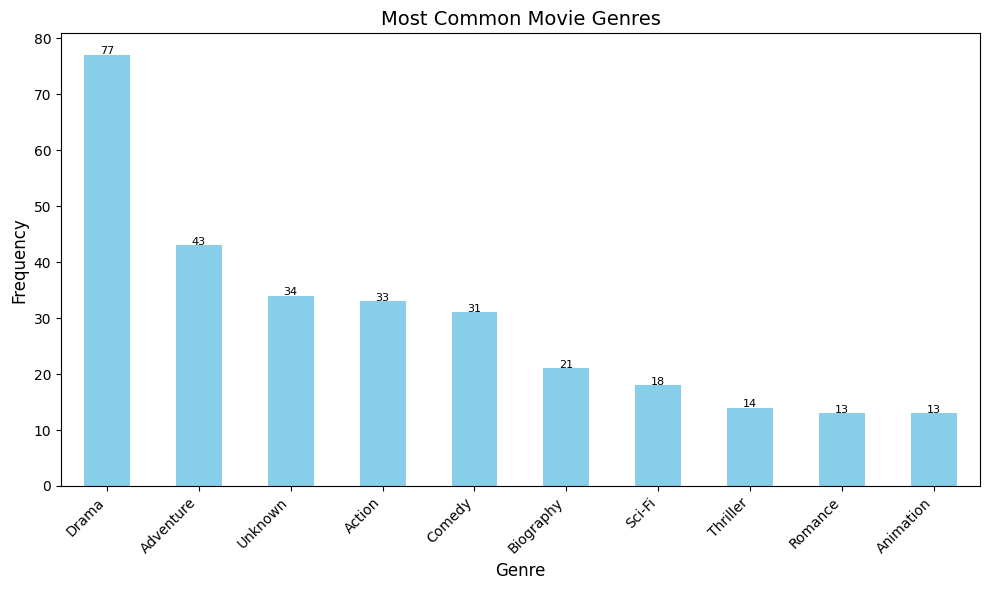

In [24]:
# Split the 'genre' column into separate genres and explode to count occurrences
genre_split = merged_data['genre'].str.split('|', expand=True).stack().reset_index(drop=True)

# Count the occurrences of each genre
genre_counts = genre_split.value_counts()[:10]

# Plot the most common genres
plt.figure(figsize=(10, 6))
ax = genre_counts.plot(kind='bar', color='skyblue')

# Add text labels above the bars
for i, v in enumerate(genre_counts):
    ax.text(i, v + 0.1, str(v), ha='center', fontsize=8)

# Title and labels
plt.title('Most Common Movie Genres', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insight:
The genre distribution of movies in our dataset paints a compelling story about audience preferences and trends in the film industry. Here’s the narrative:

- **Drama** takes the lead with a whopping **77** films, telling us that audiences are drawn to emotionally charged, character-driven stories. Drama films dominate, providing a backdrop for deeper human experiences, from heart-wrenching tales to thought-provoking narratives.
- **Adventure** follows closely with **43** films, drawing viewers into worlds of exploration, danger, and discovery. It’s clear that audiences love to embark on grand journeys, seeking thrill and excitement in unknown territories.
- Then, we encounter the **Unknown** genre, appearing **34** times. This reflects an interesting anomaly—possibly incomplete genre data or films whose true essence couldn’t be captured. It’s a reminder that even in well-defined industries, gaps and uncertainties still exist.
- **Action** (with **33** films) and **Comedy** (with **31**) are right behind. These genres are the lifeblood of Hollywood blockbusters—packed with high-energy thrills and laugh-out-loud moments that keep audiences on the edge of their seats or in fits of giggles.
- The **Biography** genre, representing **21** films, takes us deeper into real-life stories, showcasing the journeys of historical figures and unsung heroes. 
- **Sci-Fi** (18 films) and **Thriller** (14 films) appear less frequently, but their presence speaks volumes. These genres offer a glimpse into speculative futures or intense psychological experiences that leave viewers questioning reality.
- Finally, **Romance** and **Animation**, with **13** entries each, are genres that cater to the heart and imagination. Romance explores love and relationships, while Animation brings colorful stories to life, often reaching younger audiences or fans of creative storytelling.

This genre breakdown isn’t just a statistical analysis; it’s a window into the kinds of stories that resonate with audiences today. It offers us a deeper understanding of what drives the film industry and how genres evolve with audience tastes. It’s clear that Drama, Adventure, and Action are dominating the scene, while genres like Biography, Sci-Fi, and Thriller cater to more specialized tastes.

In [25]:
# Function to add regression line and correlation coefficient
def plot_with_regression(ax, x, y, data, color, title, xlabel, ylabel):
    '''
    This function creates a scatter plot with a regression line and displays the linear regression equation 
    and the correlation coefficient on a given axis. It helps visualize the relationship between two variables
    with an overlaid linear regression model.

    Parameters:
    ax (matplotlib.axes.Axes): The axes object on which to plot the scatter plot and regression line.
    x (str): The column name of the independent variable (X-axis).
    y (str): The column name of the dependent variable (Y-axis).
    data (pandas.DataFrame): The dataset containing the variables to be plotted.
    color (str): The color for the scatter plot and regression line.
    title (str): The title of the plot.
    xlabel (str): The label for the X-axis.
    ylabel (str): The label for the Y-axis.

    Returns:
    None: This function does not return any value. It modifies the provided `ax` with the scatter plot, regression line, 
    and relevant annotations.

    Functionality:
    - Plots a scatter plot of the two variables `x` and `y`.
    - Adds a linear regression line using `sns.regplot`.
    - Computes the linear regression coefficients and correlation coefficient.
    - Displays the linear regression equation and correlation coefficient as text on the plot.
    - Sets the title, X-axis label, and Y-axis label for the plot.
    - Adds a grid to the plot for better readability.

    Example:
    >>> plot_with_regression(ax, 'Budget', 'Earnings', data, 'blue', 'Budget vs Earnings', 'Budget (in millions)', 'Earnings (in millions)')

    Notes:
    - The regression line is fitted using `LinearRegression` from scikit-learn.
    - The correlation coefficient is calculated using `numpy.corrcoef`.
    - The regression equation and correlation coefficient are displayed on the plot in the form of `y = mx + b` and `Corr: r`.
    - The `ax` argument should be an instance of a matplotlib axes object (e.g., `fig.add_subplot()`).
    - The function assumes that the provided `data` is a pandas DataFrame with columns `x` and `y`.

    '''
    
    # Create a scatter plot
    sns.scatterplot(x=x, y=y, data=data, ax=ax, color=color)
    
    # Add a regression line without scatter points
    sns.regplot(x=x, y=y, data=data, ax=ax, scatter=False, color=color)
    
    # Fit the linear model using scikit-learn
    X = data[x].values.reshape(-1, 1)
    Y = data[y].values
    model = LinearRegression().fit(X, Y)
    coef = model.coef_[0]
    intercept = model.intercept_
    
    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(data[x], data[y])[0, 1]
    
    # Add regression line equation and correlation coefficient as text on the plot
    ax.text(0.05, 0.95, f'y = {intercept:.2f} + {coef:.2f}x\nCorr: {corr_coef:.2f}', transform=ax.transAxes, 
            fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1))
    
    # Set the title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Add grid to the plot for clarity
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)


### Research Question 2: Relationship Between Budget and Earnings

The second research question explores the relationship between a movie’s budget and its earnings, both domestically and worldwide. By analyzing the correlation between budget and earnings, we aim to understand how financial investment impacts a film’s financial success.

This analysis involves plotting scatter plots with regression lines and calculating the correlation coefficients to quantify the strength of these relationships.

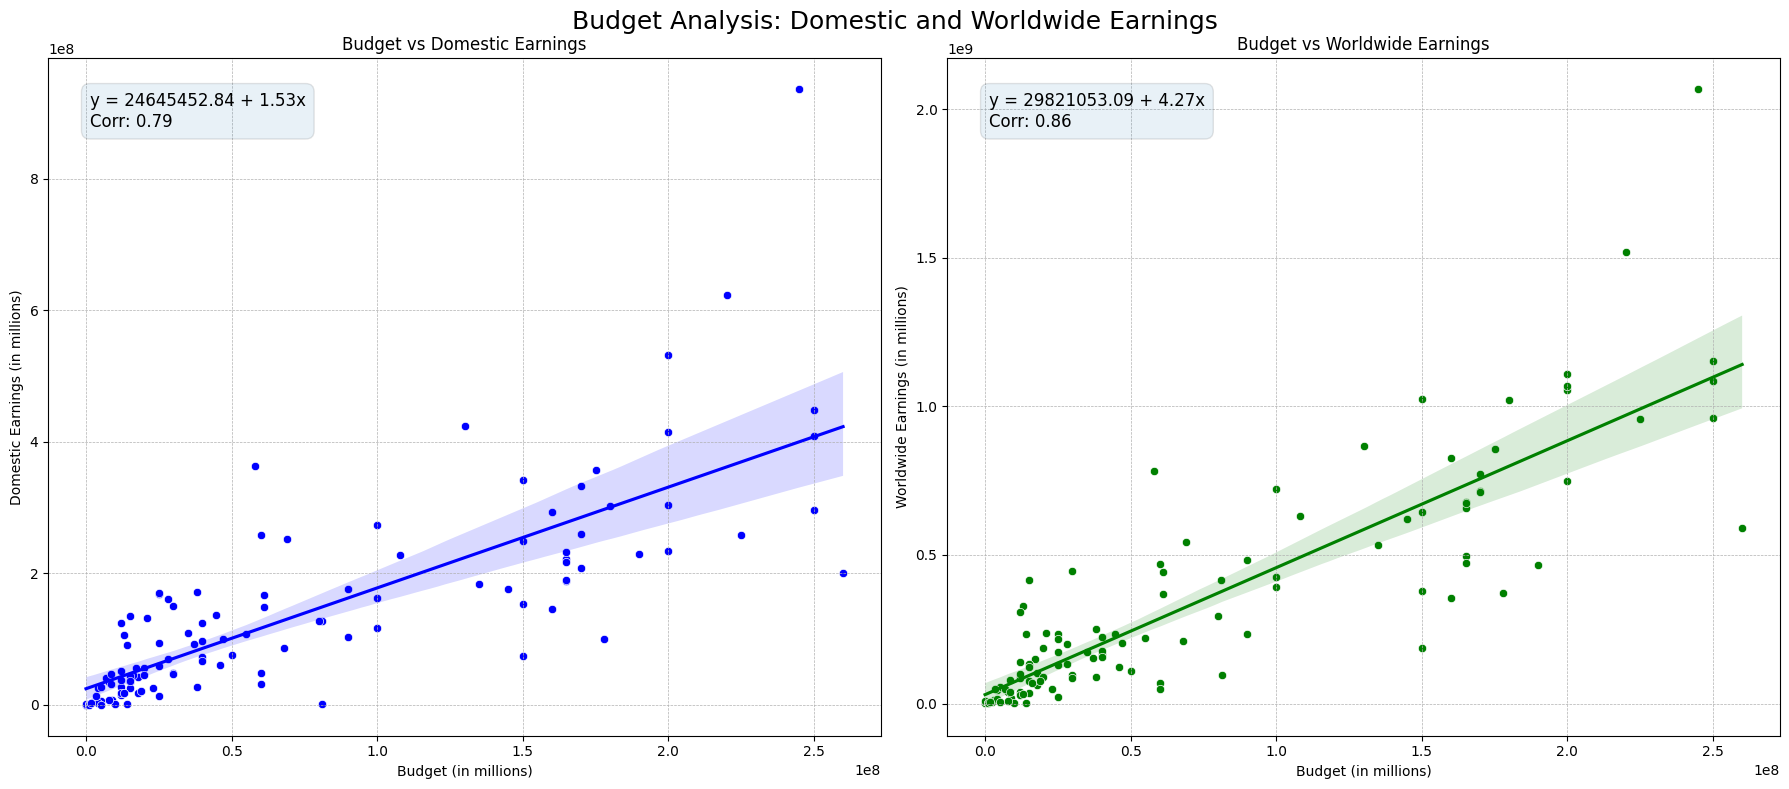

In [26]:
# Set up the figure for subplots (1x2 grid for 2 plots)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Budget Analysis: Domestic and Worldwide Earnings', fontsize=18)


# Plot Budget vs Domestic Earnings
plot_with_regression(axes[0], 'Budget', 'Domestic', merged_data, 'blue', 
                     'Budget vs Domestic Earnings', 'Budget (in millions)', 'Domestic Earnings (in millions)')

# Plot Budget vs Worldwide Earnings
plot_with_regression(axes[1], 'Budget', 'Worldwide', merged_data, 'green', 
                     'Budget vs Worldwide Earnings', 'Budget (in millions)', 'Worldwide Earnings (in millions)')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92) # Adjust the top title for better fitting

# Show the plot
plt.show()


### Insight:

#### The Tale of Budget and Earnings: A Cinematic Journey

In the world of cinema, the journey from script to screen is often paved with financial decisions that can make or break a film's success. Let's delve into the story of how budget influences both domestic and worldwide earnings, and what this means for filmmakers.

**1. Budget vs Domestic Earnings:**
- **Correlation Coefficient: 0.79**
  - Imagine a filmmaker with a vision, pouring resources into a project to ensure it captivates the local audience. The strong positive correlation of 0.79 tells us that higher budgets generally lead to higher domestic earnings. This relationship, while significant, is not absolute. It suggests that while a substantial budget can enhance production quality and marketing efforts, other elements like the film's genre, star power, and release timing also play crucial roles in drawing audiences to theaters.

**2. Budget vs Worldwide Earnings:**
- **Correlation Coefficient: 0.86**
  - Now, picture this filmmaker's dream expanding beyond borders, aiming to capture hearts globally. The even stronger correlation of 0.86 indicates that a higher budget is even more critical for worldwide success. This could be due to the ability to invest in international marketing campaigns, secure global distribution deals, and create universally appealing content. However, just like with domestic earnings, the journey to global success is influenced by cultural relevance, international market trends, and strategic distribution.

### Strategic Implications:

The narrative of budget and earnings reveals a key lesson: while financial investment is vital, it is not the sole hero of the story. 

- **Holistic Approach:** A successful film is the result of a well-rounded strategy. Allocating a substantial budget should be complemented by meticulous planning in marketing, distribution, and content creation to maximize earnings potential.
- **Risk Management:** The strong correlations highlight the importance of budgeting, but also the need to manage risks by considering other influential factors and diversifying investments across different projects.
- **Market Adaptation:** Tailoring marketing and distribution strategies to fit both domestic and international markets can further leverage the benefits of a high budget, ensuring that the film resonates well with diverse audiences.

In conclusion, the journey from budget to earnings is a complex narrative where financial investment plays a starring role, but success is achieved through a supporting cast of strategic planning, market adaptation, and creative excellence. By understanding and embracing this multifaceted approach, filmmakers can better navigate the path to both domestic and worldwide box office triumphs.

### Research Question 3: How do movie ratings influence box office revenue?

This question investigates the relationship between movie ratings and box office revenue. By analyzing the correlation between ratings and revenue, we aim to understand how critical reception impacts a film’s financial performance. This analysis involves plotting scatter plots with regression lines and calculating the correlation coefficients to quantify the strength of these relationships

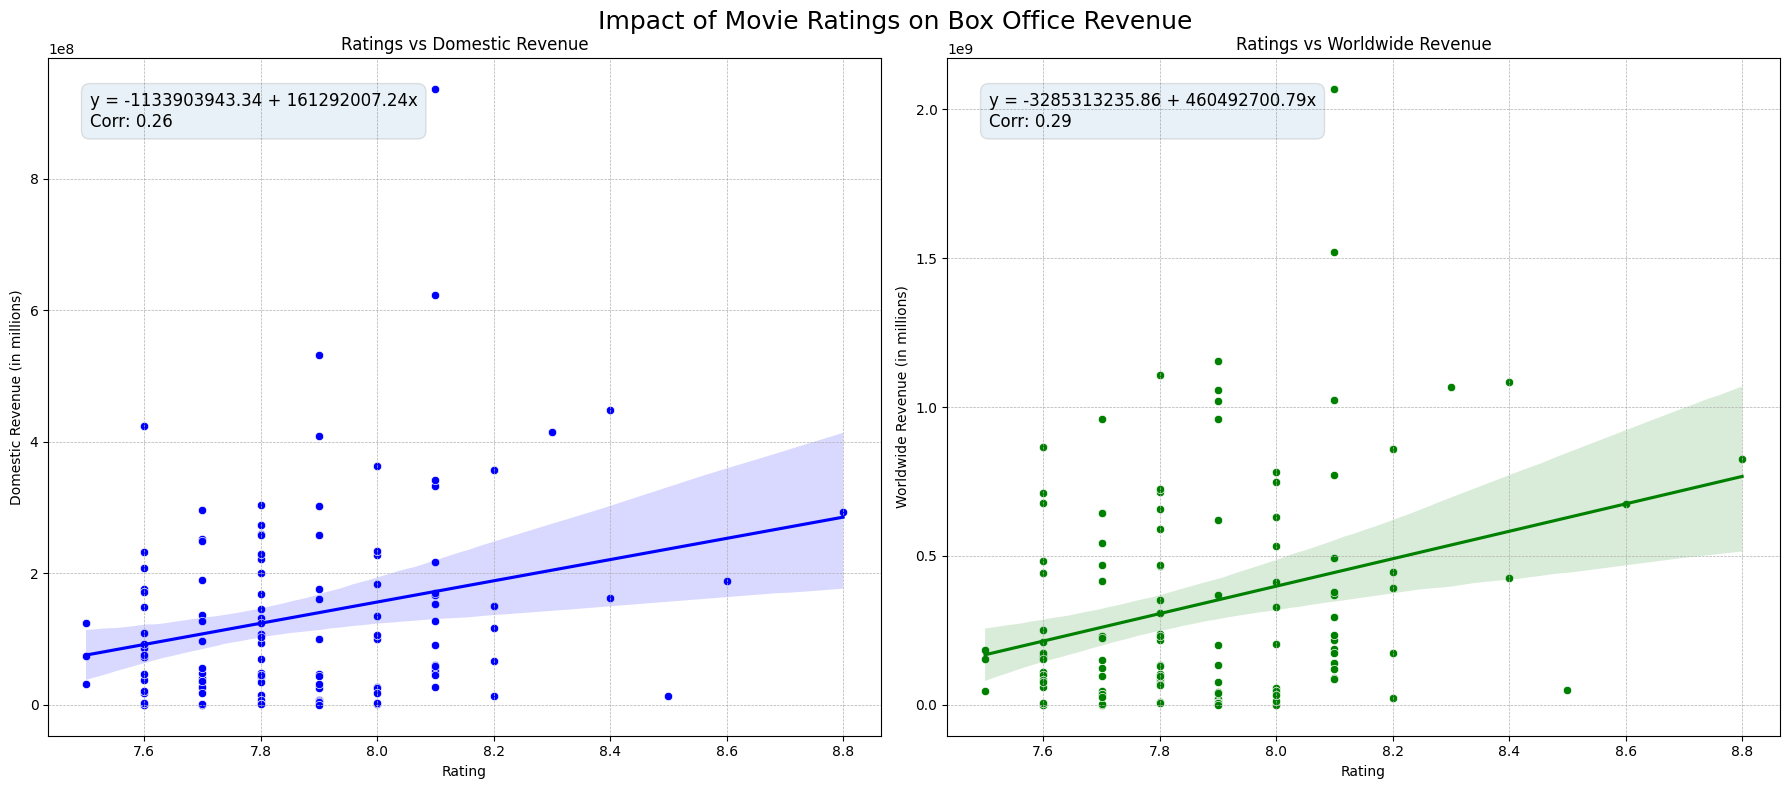

In [27]:
# Set up the figure for subplots (1x2 grid for 2 plots)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Impact of Movie Ratings on Box Office Revenue', fontsize=18)

# Plot Ratings vs Domestic Revenue
plot_with_regression(axes[0], 'Rating', 'Domestic', merged_data, 'blue', 
                     'Ratings vs Domestic Revenue', 'Rating', 'Domestic Revenue (in millions)')

# Plot Ratings vs Worldwide Revenue
plot_with_regression(axes[1], 'Rating', 'Worldwide', merged_data, 'green', 
                     'Ratings vs Worldwide Revenue', 'Rating', 'Worldwide Revenue (in millions)')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92) # Adjust the top title for better fitting

# Show the plot
plt.show()

### Insight:

#### The Influence of Movie Ratings on Box Office Revenue

**1. Ratings vs Domestic Revenue:**
- **Correlation Coefficient: 0.26**
  - The correlation between movie ratings and domestic revenue is relatively weak, with a coefficient of 0.26. This suggests that while higher ratings might have some positive impact on domestic earnings, the influence is not particularly strong. Other factors, such as marketing efforts, release timing, and audience preferences, likely play a more significant role in driving domestic box office success.

**2. Ratings vs Worldwide Revenue:**
- **Correlation Coefficient: 0.29**
  - Similarly, the correlation between movie ratings and worldwide revenue is also weak, with a coefficient of 0.29. This indicates that higher ratings do not strongly predict higher worldwide earnings. The global market is influenced by a myriad of factors, including cultural differences, international marketing strategies, and distribution networks, which can overshadow the impact of ratings.

### Considerations:

It is important to note that the relatively small size of the dataset might affect these correlation results. With a larger dataset, we might observe different patterns or stronger correlations. Therefore, while these findings provide some insights, they should be interpreted with caution. 

### Research Question 4: How Are Movie Runtimes Distributed?

This analysis aims to explore the distribution of movie runtimes within our dataset. By examining the runtime data, we can uncover patterns that reflect industry trends, audience preferences, and narrative conventions. For this, we will visualize the distribution of movie runtimes using a histogram. The histogram will provide insights into whether there is a standard movie runtime, and if so, how most movies align with that norm.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


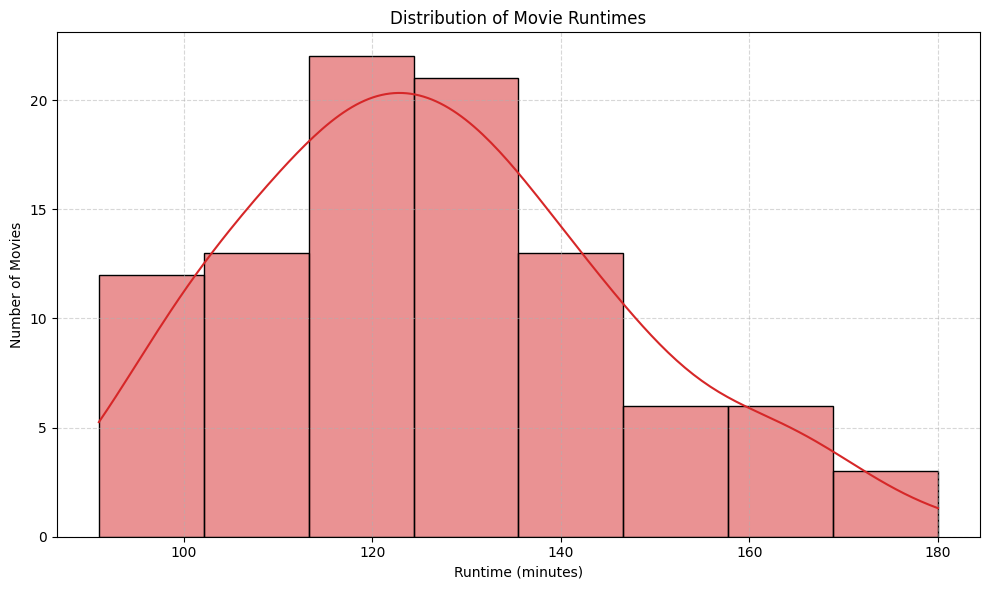

In [28]:
# Exclude movies with 0 runtime
filtered_data = merged_data[merged_data['Runtime'] > 0]

# Calculate the Freedman-Diaconis bin width
q25, q75 = np.percentile(filtered_data['Runtime'].dropna(), [25, 75])
bin_width = 2 * (q75 - q25) * len(filtered_data['Runtime']) ** (-1 / 3)

# To ensure bins are not too large, you can manually adjust or choose a maximum bin width.
max_bin_width = 10  # Optional: you can set this limit to avoid overly large bins
bin_width = min(bin_width, max_bin_width)  # Apply max bin width constraint
bins = int((filtered_data['Runtime'].max() - filtered_data['Runtime'].min()) / bin_width)

# Plotting the distribution of movie runtimes with dynamic bins, excluding 0 duration
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='Runtime', bins=bins, kde=True, color="tab:red")
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.grid(visible=True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

#### Analyzing Movie Runtimes: A Data-Driven Insight

**The histogram above provides an insightful view of movie runtimes and illustrates a distinct normal distribution, peaking around the 120-minute mark.** This pattern indicates a prevailing industry preference for films of this length, possibly shaped by audience expectations, narrative structures, and logistical considerations for theatrical releases.

#### Key Insights:

* **Peak Popularity:** The majority of films cluster within the 100-140 minute range, with a clear concentration around the two-hour mark. This is likely a result of balancing engaging storytelling with practical factors such as theater scheduling and audience attention spans.
  
* **Distribution Tail:** While most movies fall within the central range, a noticeable decline in frequency occurs at both shorter and longer durations. Shorter films may cater to niche genres or formats (e.g., short films), while longer films often represent epic narratives or director-driven projects that break conventional runtime boundaries.

#### Implications:

* **Audience Preferences:** The trend toward mid-length films suggests that audiences generally favor stories within this timeframe. This can guide filmmakers and production companies in determining ideal runtimes for specific genres and target demographics.

* **Industry Norms:** The observed normal distribution might reflect established industry standards, where filmmakers often target a certain runtime to align with commercial and distribution goals, such as maximizing theater slots and marketing impact.

* **Shifting Trends:** It would be valuable to explore how movie runtimes have evolved, especially considering the rise of streaming platforms, changes in audience viewing habits, and technological advancements, all of which may influence future trends in film length.

#### Further Exploration:

To expand upon this analysis, consider the following avenues:

* **Genre-Specific Trends:** Investigating how runtimes vary across different genres could uncover specific audience expectations and the narrative conventions that shape storytelling within each category.

* **Directorial Influence:** Analyzing runtimes in relation to specific directors may reveal distinct preferences for pacing and narrative structure, offering insights into creative choices.

* **Box Office Impact:** Studying the relationship between runtime and box office success could reveal whether certain lengths have a tangible effect on a film's commercial performance.

By examining the distribution of movie runtimes, we gain a deeper understanding of the industry’s conventions, audience preferences, and the practical considerations that influence filmmaking decisions.

### Conclusion

This analysis provided valuable insights into various aspects of the movie industry, shedding light on how different factors shape trends and success in the world of cinema. Through the exploration of key questions, we’ve uncovered the underlying patterns that drive audience preferences, revenue generation, and industry norms. However, it is important to note that the dataset used in this analysis is relatively small, which may limit the generalizability of the findings. A larger dataset could provide more robust insights and stronger correlations.

1. **Genre Distribution**: The genre distribution reveals the dominant genres in the film industry today, with Drama, Adventure, and Action taking the lead. This reflects broader audience preferences for emotionally engaging narratives and thrilling, action-packed stories. The less frequent genres, like Biography, Sci-Fi, and Thriller, suggest a more niche audience, catering to specific tastes. However, given the small dataset, these results might not fully capture the diversity of genres in the broader film industry.

2. **Budget and Earnings**: The analysis highlighted the strong correlation between movie budgets and earnings, especially in the global market. A higher budget significantly enhances a film’s chances of success, though other factors such as marketing, distribution, and content quality remain essential. The relationship between budget and earnings is not deterministic, and the true success of a film lies in a holistic approach, balancing finances with creative and strategic efforts. It's important to consider that a larger dataset could provide more accurate insights into the impact of budget on earnings across various genres and time periods.

3. **Ratings and Revenue**: Interestingly, movie ratings showed a weak correlation with both domestic and worldwide revenue. This suggests that while ratings may influence audience decisions, they are not the primary driver of box office success. Factors like marketing, star power, and audience preferences appear to play a more significant role in determining revenue. The small size of the dataset may have contributed to the weak correlation, and further research with a larger sample could reveal more significant patterns.

4. **Movie Runtimes**: The distribution of movie runtimes displayed a clear preference for films around the 120-minute mark. This aligns with audience expectations, offering a balance between engaging storytelling and the practical constraints of theatrical scheduling. Understanding this trend can help filmmakers optimize runtime for different genres and target audiences. Given the dataset's limited size, these findings may be influenced by a small number of films in certain runtime ranges. It would be beneficial to explore how runtime preferences have evolved over time with a larger dataset.

### Key Takeaways
- **Industry Preferences**: The film industry gravitates toward certain genres and runtime lengths, shaping how movies are produced and marketed.
- **Strategic Financial Decisions**: A higher budget can significantly impact earnings, but its success is tied to a broader strategy that includes effective marketing and distribution.
- **Audience-Centric Filmmaking**: Understanding audience preferences—whether through genre selection, runtime length, or even movie ratings—can help filmmakers craft films that resonate more strongly with viewers.
- **Evolving Trends**: As the film industry adapts to new technologies and changing audience behaviors (e.g., streaming), it will be interesting to see how these insights evolve in the coming years.

### Considerations
- **Dataset Limitations**: The relatively small size of the dataset used in this analysis should be taken into account. While the insights drawn are valuable, they may not fully represent the broader trends in the global film industry. A more extensive dataset would allow for more comprehensive and reliable conclusions.
- **Future Research**: Future analyses could focus on a larger dataset, which could provide more robust patterns and reveal insights that are more representative of the global movie industry. Additionally, exploring the impact of other variables—such as distribution channels, star power, and marketing spend—could further enrich the understanding of what drives movie success.

In conclusion, the findings provide a comprehensive view of the complex dynamics that govern the movie industry. Filmmakers and industry professionals can use these insights to make informed decisions about production, marketing, and distribution, ensuring that their films align with audience expectations and maximize their potential for success. However, the limitations of the dataset emphasize the need for further exploration with more extensive data to refine these insights.